In [1]:
import matplotlib.animation as animation

from brian2 import *
from brian2.core.functions import timestep

import networkx as nx

%matplotlib inline

### global parameters
N = 100
defaultclock.dt = 1*ms


### simulation code
def run_sim(K, random_seed=214040893):
    seed(random_seed)

    eqs = '''
    dTheta/dt = omega + K/N*coupling : radian
    omega : radian/second (constant) # intrinsic frequency
    coupling : 1
    '''

    oscillators = NeuronGroup(N, eqs, method='euler')
    oscillators.Theta = 'rand()*2*pi'  # random initial phase
    oscillators.omega = 'clip(0.5 + randn()*0.5, 0, inf)*radian/second'  # 𝒩(0.5, 0.5)

    connections = Synapses(oscillators, oscillators,
                        'coupling_post = sin(Theta_pre - Theta_post) : 1 (summed)')
    connections.connect()  # all-to-all

    mon = StateMonitor(oscillators, 'Theta', record=True)
    run(10*second)
    return mon.Theta[:]

### Create animated plots
frame_delay = 40*ms

# Helper functions
def to_x_y(phases):
    return np.cos(phases), np.sin(phases)

def calc_coherence_and_phase(x, y):
    phi = np.arctan2(np.sum(y), np.sum(x))
    r = np.sqrt(np.sum(x)**2 + np.sum(y)**2)/N
    return r, phi

# Plot an animation with the phase of each oscillator and the average phase
def do_animation(fig, axes, K_values, theta_values):
    '''
    Makes animated subplots in the given ``axes``, where each ``theta_values`` entry
    is the full recording of ``Theta`` from the monitor.
    '''
    artists = []
    for ax, K, Theta in zip(axes, K_values, theta_values):
        x, y = to_x_y(Theta.T[0])
        dots = ax.scatter(x, y, c=Theta.T[0])
        r, phi = calc_coherence_and_phase(x, y)
        arrow = ax.arrow(0, 0, r*np.cos(phi), r*np.sin(phi), color='black')
        mean_dot, = ax.plot(r*np.cos(phi), r*np.sin(phi), 'o', color='black')
        if abs(K) > 0:
            title = f"coupling strength K={K:.1f}"
        else:
            title = "uncoupled"
        ax.text(-1., 1.05, title, color='gray', va='bottom')
        ax.set_aspect('equal')
        ax.set_axis_off()
        ax.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))
        artists.append((dots, arrow, mean_dot))


    def update(frame_number):
        updated_artists = []
        for (dots, arrow, mean_dot), K, Theta in zip(artists, K_values, theta_values):
            t = frame_delay*frame_number
            ts = timestep(t, defaultclock.dt)
            x, y = to_x_y(Theta.T[ts])
            dots.set_offsets(np.vstack([x, y]).T)
            r, phi = calc_coherence_and_phase(x, y)
            arrow.set_data(dx=r*np.cos(phi), dy=r*np.sin(phi))
            mean_dot.set_data(r*np.cos(phi), r*np.sin(phi))
            updated_artists.extend([dots, arrow, mean_dot])
        return updated_artists

    ani = animation.FuncAnimation(fig, update, frames=int(magic_network.t/frame_delay),
                                interval=20, blit=True)

    return ani

Running simulation for K=0.0
Running simulation for K=1.0
Running simulation for K=2.0
Running simulation for K=4.0


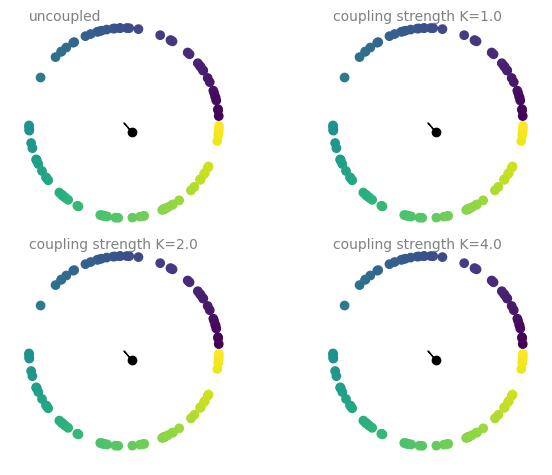

In [2]:
fig, axs = plt.subplots(2, 2)
# Manual adjustments instead of layout='tight', to avoid jumps in saved animation
fig.subplots_adjust(left=0.025, bottom=0.025, right=0.975,  top=0.975,
                    wspace=0, hspace=0)
K_values = [0, 1, 2, 4]
theta_values = []
for K in K_values:
    print(f"Running simulation for K={K:.1f}")
    theta_values.append( run_sim(K/second))
ani = do_animation(fig, axs.flat, K_values, theta_values)

plt.show()

In [6]:
K = 0
run_sim(K/second)

array([[ 2.13448003,  2.1349001 ,  2.13532018, ...,  6.33398589,
         6.33440596,  6.33482604],
       [ 5.54592851,  5.54592851,  5.54592851, ...,  5.54592851,
         5.54592851,  5.54592851],
       [ 3.40979611,  3.40979611,  3.40979611, ...,  3.40979611,
         3.40979611,  3.40979611],
       ...,
       [ 1.80982047,  1.81034268,  1.81086489, ...,  7.0303611 ,
         7.03088331,  7.03140552],
       [ 5.1445888 ,  5.14490137,  5.14521393, ...,  8.26931503,
         8.2696276 ,  8.26994017],
       [ 5.19457128,  5.19534308,  5.19611488, ..., 12.91023475,
        12.91100655, 12.91177835]])

In [13]:
N = 100
eqs = '''
dTheta/dt = omega + K/N*coupling : radian
omega : radian/second (constant) # intrinsic frequency
coupling : 1
'''

oscillators = NeuronGroup(N, eqs, method='euler')
oscillators.Theta = 'rand()*2*pi'  # random initial phase
oscillators.omega = 'clip(0.5 + randn()*0.5, 0, inf)*radian/second'  # 𝒩(0.5, 0.5)

connections = Synapses(oscillators, oscillators,
                    'coupling_post = sin(Theta_pre - Theta_post) : 1 (summed)')
connections.connect()  # all-to-all

# mon = StateMonitor(oscillators, 'Theta', record=True)
# run(10*second)

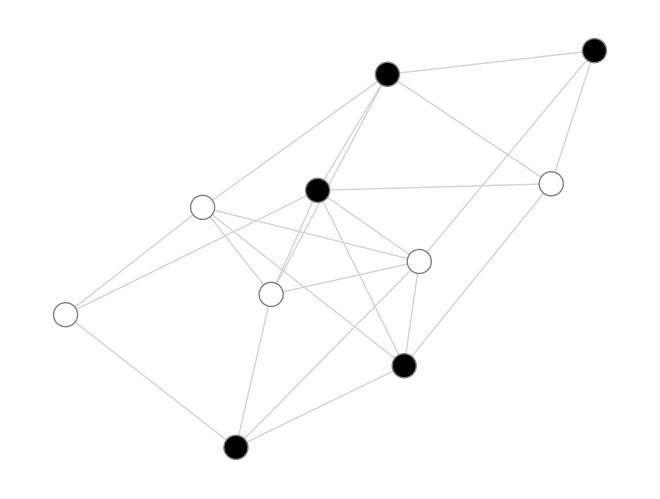

In [48]:
import numpy as np
import matplotlib as mpl

N = 10
p = 0.5

# how many states each node can have
num_states_per_node = 2

# an array of 0s and 1s giving node states
node_states = np.random.randint(num_states_per_node, size = N)

# here we are creating a random graph
G = nx.erdos_renyi_graph(N, p)
#nx.set_node_attributes(G, values=node_states, name='state')

nx.draw(G, node_color = node_states, edgecolors = 'grey', edge_color = 'lightgrey', cmap=mpl.colormaps['binary'])


In [49]:
anim = animation.FuncAnimation(fig, animate, frames=num_steps, interval=1000, repeat=False)

NameError: name 'animate' is not defined

In [50]:
from matplotlib import pyplot as plt, animation


In [51]:

G = nx.from_numpy_matrix()

TypeError: from_numpy_matrix() missing 1 required positional argument: 'A'

In [52]:
np.random.randint()

6

In [76]:
A = np.random.randint(num_states_per_node, size = [N,N])
A = np.triu(A, k = 1)

G = nx.from_numpy_array(A)

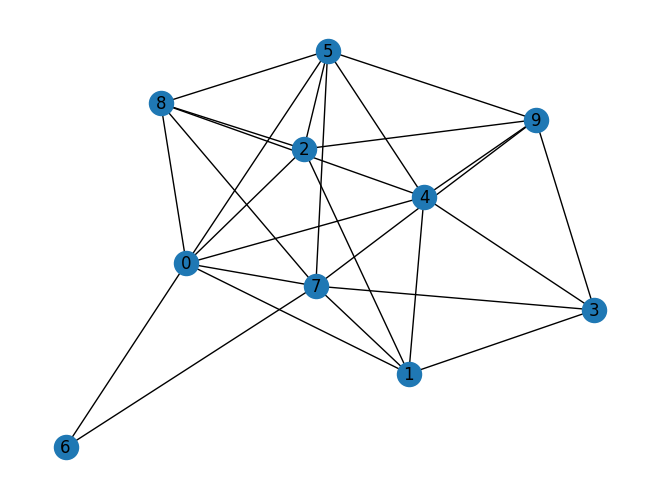

In [77]:
nx.draw(G, with_labels = True)

In [74]:
A.T

array([[0, 0, 0, 0, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 0, 0, 1, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]])